In [13]:
import pandas as pd
from ase.db import connect
from ase import Atoms
from ase.io import read
import numpy as np
import numpy.linalg as linalg
def eig_data(atoms):
    init_R = atoms.positions
    init_Z = atoms.numbers
    x_list = []
    y_list = []
    z_list = []
    M_list = []
    M_tmp = []
    M_matrix = []
    for x,y,z in init_R:
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
    order=0
    for xl,yl,zl,Z in zip(x_list,y_list,z_list,init_Z):
        M_list.append((order,xl,yl,zl,Z))
        order+=1
    for order,x,y,z,charge in M_list:
        r = np.array((x,y,z))
        M_tmp = []
        for oorder,ox,oy,oz,ocharge in M_list:
            if oorder == order:
                IJ = 0.5*ocharge**2.4
                M_tmp.append(IJ)
            else:
                otr = np.array((ox,oy,oz))
                dist = np.linalg.norm(r-otr)
                InJ = (charge*ocharge)/dist
                M_tmp.append(InJ)
        M_matrix.append(M_tmp)
    M = np.array(M_matrix)
    w,v = np.linalg.eig(M)
    w_sort = np.sort(w)[::-1]
#    print(np.amax(w_sort))
    return w_sort
res = connect('c2db.db')
df = []
for row in res.select():
    atoms = row.toatoms()
    i = row.id
    cm = eig_data(atoms)
    if cm.shape[0] != 3:
        continue
    f = row.formula
    E = row.energy
    g = row.gap
    w = row.workfunction
    s = row.spacegroup
    df.append({'id': i, 'fingerprint':cm, 'formula':f, 'energy': E, 'band_gap':g, 'work_function':w, 'space_group':s})
df = pd.DataFrame(df)

In [14]:
print(df.describe())
df

                id       energy     band_gap  work_function
count  1228.000000  1228.000000  1228.000000    1228.000000
mean   1893.764658   -14.202319     0.429839       5.025139
std    1104.419358     4.881739     1.014154       0.983082
min      13.000000   -29.318467     0.000000       2.487626
25%     876.750000   -17.466914     0.000000       4.378386
50%    1830.500000   -13.846528     0.000000       4.974134
75%    2876.250000   -10.571678     0.178327       5.594821
max    3739.000000    -4.345323     6.450904       8.225835


id                                        fingerprint formula  \
0       13  [3137.228031104635, 2155.3999917667084, 1820.5...  AsBrSe   
1       14  [20370.830953982968, 6447.831911904273, 2460.3...  BiBrTe   
2       15  [6662.771284638622, 2374.908639439283, 925.016...  CrSeTe   
3       16  [20329.53124816473, 6391.025122562292, 3653.37...  BiMoSb   
4       17  [7061.6396852566395, 3550.706004309225, 423.17...   NbClI   
...    ...                                                ...     ...   
1223  3735  [17918.33930504896, 8.735564996221633, 4.29314...   AuLi2   
1224  3736  [14341.335667029429, 8.112105833861888, 5.1410...   HfLi2   
1225  3737  [1486.8043850781667, 0.6793782376238223, -0.03...    NiH2   
1226  3738  [4398.262856761632, 0.7172396365462136, 0.0320...    RuH2   
1227  3739  [15315.505529327804, 0.745674719418771, 0.0707...     WH2   

         energy  band_gap  work_function space_group  
0    -10.613931  1.228200       5.266643        P3m1  
1    -10.975266  0.629904       5.587519        P3m1  
2    -16.618984  0.000000       4.576962        P3m1  
3    -19.491637  0.000000       4.416695        P3m1  
4    -15.141347  0.000000       3.818156        P3m1  
...         ...       ...            ...         ...  
1223  -7.323839  0.000000       2.762386       P-6m2  
1224 -10.344351  0.000000       2.487626       P-6m2  
1225 -13.674328  0.000000       4.751586       P-6m2  
1226 -15.265764  0.000000       5.321232       P-6m2  
1227 -16.834813  0.000000       4.527930       P-6m2  

[1228 rows x 7 columns]

In [15]:
print(set(df['space_group']))

{'P3m1', 'P-3m1', 'Pmm2', 'P-4m2', 'P-6m2'}


In [16]:
print(df[df['space_group']=='P3m1'])

        id                                        fingerprint formula  \
0       13  [3137.228031104635, 2155.3999917667084, 1820.5...  AsBrSe   
1       14  [20370.830953982968, 6447.831911904273, 2460.3...  BiBrTe   
2       15  [6662.771284638622, 2374.908639439283, 925.016...  CrSeTe   
3       16  [20329.53124816473, 6391.025122562292, 3653.37...  BiMoSb   
4       17  [7061.6396852566395, 3550.706004309225, 423.17...   NbClI   
...    ...                                                ...     ...   
1199  3697  [7560.568458288379, 5700.7816399628055, 2249.8...   ISbSe   
1200  3698  [15055.303808358407, 6357.301138739094, 365.88...   TaSTe   
1201  3699  [6351.531494970359, 2208.969940182122, 839.687...   VAsSb   
1202  3700  [15611.938729257545, 6680.623708140398, 2436.5...    WBrI   
1203  3701  [6734.427708413978, 3357.309645195963, 362.211...   ZrSTe   

         energy  band_gap  work_function space_group  
0    -10.613931  1.228200       5.266643        P3m1  
1    -10.9752

Mean = [9185.63685186 3107.84552315 1565.25524159]

Centered = [[-6048.40882075  -952.44553138   255.25447867]
 [11185.19410213  3339.98638875   895.05451333]
 [-2522.86556722  -732.93688371  -640.23865236]
 ...
 [-7698.83246678 -3107.16614491 -1565.29251583]
 [-4787.37399509 -3107.12828351 -1565.22315671]
 [ 6129.86867747 -3107.09984843 -1565.18446179]]

Covariance matrix = [[43706280.6534251  10068981.50589977  4993445.51748652]
 [10068981.50589977 11773179.54546202  4392113.20015088]
 [ 4993445.51748652  4392113.20015088  3795152.72619892]]

U matrix = [[-0.94876452  0.31559404 -0.0156936 ]
 [-0.28466    -0.87521673 -0.39110658]
 [-0.13716621 -0.36660071  0.92021158]]

S matrix = [47449220.269224    9982127.46884133  1843265.18702072]

V matrix = [[-0.94876452  0.31559404 -0.0156936 ]
 [-0.28466    -0.87521673 -0.39110658]
 [-0.13716621 -0.36660071  0.92021158]]



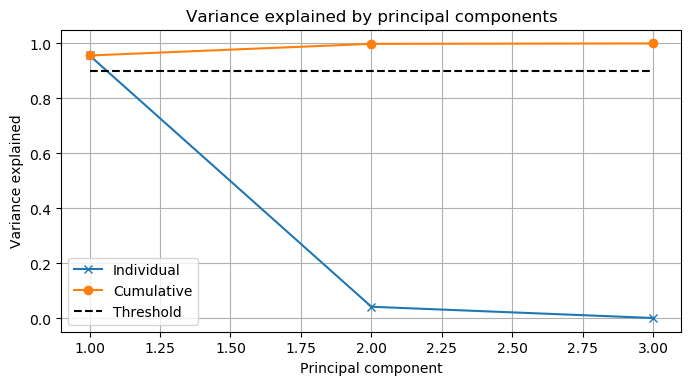

In [17]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.decomposition import PCA
%matplotlib inline

# Convert the (1228,3) shape features into a matrix
X = np.array(df['fingerprint'].tolist())
# Calculate the mean of each column
M = np.mean(X.T, axis=1)
print('Mean = {0}\n'.format(M))
# Center columns by subtracting column means
C = X - M
print('Centered = {0}\n'.format(C))
# Calculate covariance matrix of centered matrix
Sigma = np.cov(C.T)
print('Covariance matrix = {0}\n'.format(Sigma))
# Singular value decomposition of covariance matrix (one can also use eig()) 
U, S, VT = np.linalg.svd(Sigma,full_matrices=False)
V = VT.T
print('U matrix = {0}\n'.format(U))
print('S matrix = {0}\n'.format(S))
print('V matrix = {0}\n'.format(V))
# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 
# Plot variance explained
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[0.9, 0.9],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.savefig('explained_variance.png')
plt.show()


Reduced 2d feature matrix = [[  5974.6265484   -1168.82197932]
 [-11685.64708055    278.64100378]
 [  2690.06226204     79.98923021]
 ...
 [  8403.57025255    863.57549965]
 [  5641.26146351   1782.35587468]
 [ -4716.64443605   5227.73351426]]


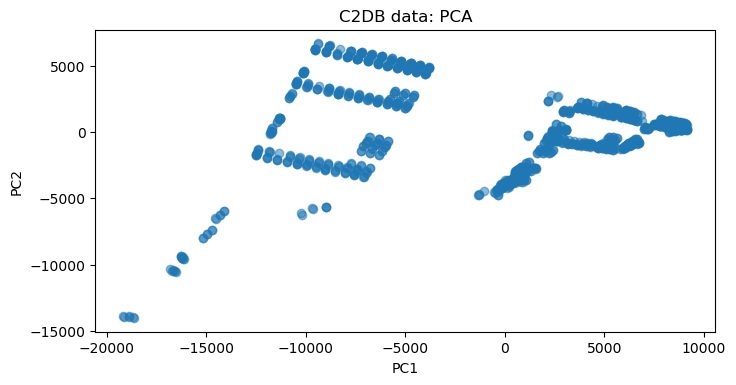

In [18]:
# Reduce the 3d features to 2d principle components
Xr = np.dot(C, V[:,:2])
print('Reduced 2d feature matrix = {0}'.format(Xr))

# Project the centered data onto principal component space
Z = np.dot(C, V)
# Indices of the principal components to be plotted
i = 0
j = 1
# Plot PCA of the data
f = plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')
plt.title('C2DB data: PCA')
plt.plot(Z[:,i], Z[:,j], 'o', alpha=.5)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.savefig('pca.png')
plt.show()

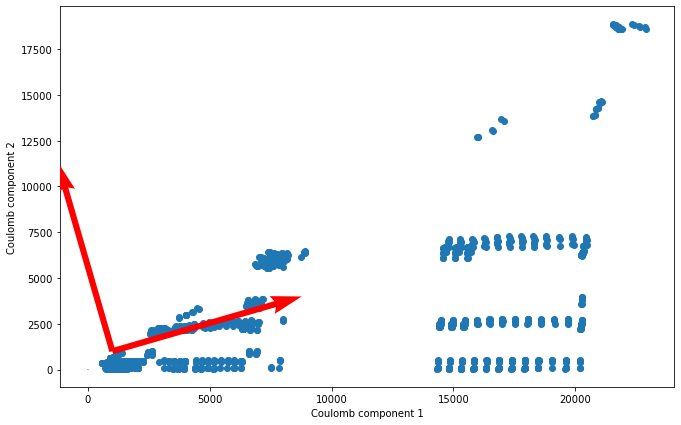

In [53]:
from sklearn.decomposition import PCA
import numpy as np

plt.scatter(X[:,0],X[:,1])
pca = PCA(n_components=2)
pca.fit(X[:,:2])
#print(pca.explained_variance_ratio_) 
#print(pca.components_)
axis = pca.components_.T
axis /= axis.std()
x_axis, y_axis = axis

plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=1)
plt.quiver(1000, 1000, x_axis, y_axis, zorder=11, width=0.01, scale=6, color='red')
plt.xlabel('Coulomb component 1')
plt.ylabel('Coulomb component 2')
plt.rcParams["figure.figsize"] = (7,7)
plt.savefig('pca_directions.png')
plt.show()

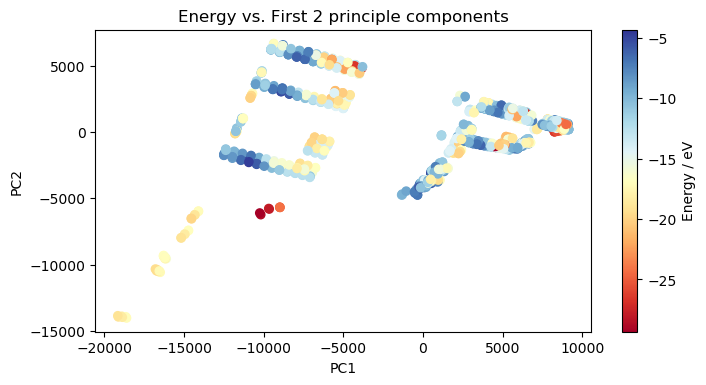

In [27]:
import matplotlib.pyplot as plt
# Convert the all variables to (1228,1) shape
x0 = Xr[:,0].reshape(1228,1)
x1 = Xr[:,1].reshape(1228,1)
y = np.array(df['energy'].values.reshape(1228,1))

# Plot band gap as a function of the 2d features (PC1 and PC2)
cm = plt.cm.get_cmap('RdYlBu')
fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')
sc = plt.scatter(x0, x1, c=y, s=35, cmap=cm)
cb = plt.colorbar(sc)
plt.title('Energy vs. First 2 principle components')
plt.xlabel('PC1')
plt.ylabel('PC2')
cb.set_label('Energy / eV')
plt.savefig('E-2PC.png')
plt.show()

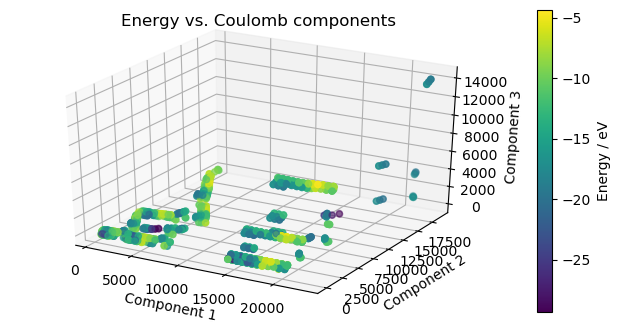

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import random

fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x2 = [i[0] for i in X]
y2 = [i[1] for i in X]
z2 = [i[2] for i in X]
v = df['energy']
img = ax.scatter(x2, y2, z2, c=v)
cb = fig.colorbar(img)
plt.title('Energy vs. Coulomb components')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
cb.set_label('Energy / eV')
plt.savefig('E-xyz.png')
plt.show()

In [22]:
df = pd.concat([df, pd.get_dummies(df['space_group'])], axis=1)
df

id                                        fingerprint formula  \
0       13  [3137.228031104635, 2155.3999917667084, 1820.5...  AsBrSe   
1       14  [20370.830953982968, 6447.831911904273, 2460.3...  BiBrTe   
2       15  [6662.771284638622, 2374.908639439283, 925.016...  CrSeTe   
3       16  [20329.53124816473, 6391.025122562292, 3653.37...  BiMoSb   
4       17  [7061.6396852566395, 3550.706004309225, 423.17...   NbClI   
...    ...                                                ...     ...   
1223  3735  [17918.33930504896, 8.735564996221633, 4.29314...   AuLi2   
1224  3736  [14341.335667029429, 8.112105833861888, 5.1410...   HfLi2   
1225  3737  [1486.8043850781667, 0.6793782376238223, -0.03...    NiH2   
1226  3738  [4398.262856761632, 0.7172396365462136, 0.0320...    RuH2   
1227  3739  [15315.505529327804, 0.745674719418771, 0.0707...     WH2   

         energy  band_gap  work_function space_group  P-3m1  P-4m2  P-6m2  \
0    -10.613931  1.228200       5.266643        P3m1      0      0      0   
1    -10.975266  0.629904       5.587519        P3m1      0      0      0   
2    -16.618984  0.000000       4.576962        P3m1      0      0      0   
3    -19.491637  0.000000       4.416695        P3m1      0      0      0   
4    -15.141347  0.000000       3.818156        P3m1      0      0      0   
...         ...       ...            ...         ...    ...    ...    ...   
1223  -7.323839  0.000000       2.762386       P-6m2      0      0      1   
1224 -10.344351  0.000000       2.487626       P-6m2      0      0      1   
1225 -13.674328  0.000000       4.751586       P-6m2      0      0      1   
1226 -15.265764  0.000000       5.321232       P-6m2      0      0      1   
1227 -16.834813  0.000000       4.527930       P-6m2      0      0      1   

      P3m1  Pmm2  
0        1     0  
1        1     0  
2        1     0  
3        1     0  
4        1     0  
...    ...   ...  
1223     0     0  
1224     0     0  
1225     0     0  
1226     0     0  
1227     0     0  

[1228 rows x 12 columns]

In [44]:
print(np.corrcoef(X[:,2015530.cif],df['energy']))

[[1.        0.2300754]
 [0.2300754 1.       ]]


In [38]:
X[:,1]

array([2.15539999e+03, 6.44783191e+03, 2.37490864e+03, ...,
       6.79378238e-01, 7.17239637e-01, 7.45674719e-01])

In [24]:
print(np.cov(df['energy'],df['work_function']))

[[23.83138041  0.12803937]
 [ 0.12803937  0.96644982]]
